In [ ]:
# Importing essential libraries

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the dataset

df = pd.read_csv("/content/drive/MyDrive/Parkinson's Disease Detection /parkinsons.csv")

**Exploring the dataset**

In [ ]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335




Each column in the table is a
particular voice measure

**Attribute Information:**

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several
measures of variation in fundamental frequency

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

NHR,HNR - Two measures of ratio of noise to tonal components in the voice
status - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE,D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [ ]:
# Returns number of rows and columns of the dataset
df.shape

(195, 24)

In [ ]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [ ]:
# Returns basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
# Returns basic statistics on numeric columns
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
# check if any null value is present
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

**Data Visualization**

In [ ]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

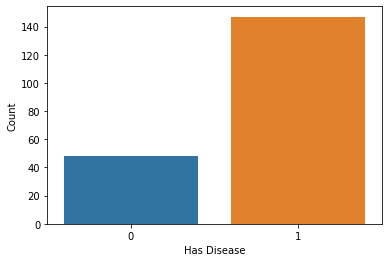

In [ ]:
sns.countplot(x='status', data=df)

plt.xlabel('Has Disease')
plt.ylabel('Count')

plt.show()

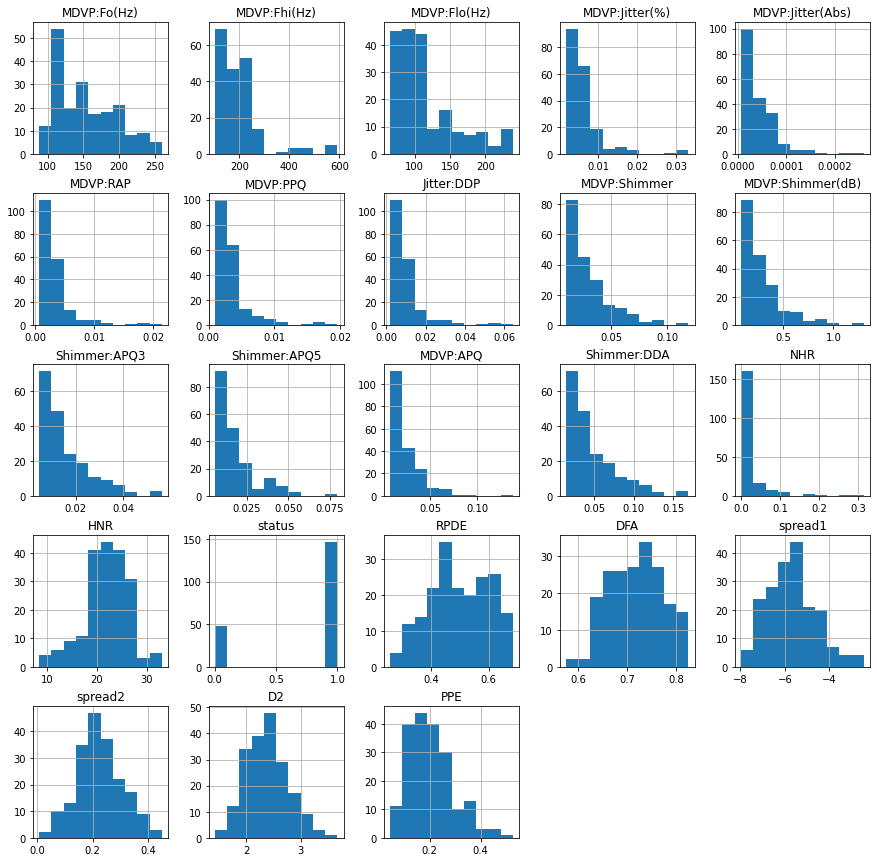

In [ ]:
#histogram for each  feature
df.hist(bins=10,figsize=(15,15))
plt.show()

In [ ]:
## Correlation
df.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


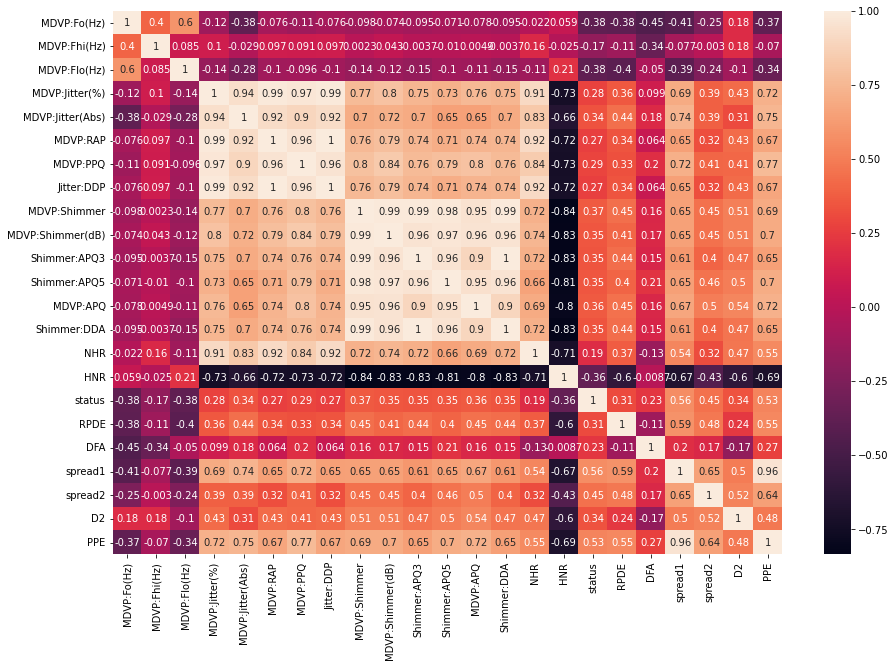

In [ ]:
#Correlation

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True)

**Feature Scaling**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['status','name'], axis=1)
y = df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (156, 22), X_test size: (39, 22)


In [ ]:
X_train.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
120,128.940,479.697,88.251,0.00581,0.00005,0.00241,0.00314,0.00723,0.02008,0.221,...,0.01734,0.02548,0.02350,24.743,0.487756,0.684130,-6.186128,0.279933,2.686240,0.152428
98,125.791,140.557,96.206,0.01378,0.00011,0.00826,0.00655,0.02478,0.04689,0.422,...,0.03908,0.07625,0.10323,15.433,0.571010,0.690892,-5.159169,0.202146,2.441612,0.260375
58,116.879,131.897,108.153,0.00788,0.00007,0.00334,0.00493,0.01003,0.02645,0.265,...,0.02137,0.04183,0.00786,22.603,0.540049,0.813432,-4.476755,0.262633,1.827012,0.326197
80,96.106,108.664,84.510,0.00694,0.00007,0.00389,0.00415,0.01168,0.04024,0.364,...,0.02876,0.06799,0.01823,19.055,0.544805,0.770466,-4.441519,0.155097,2.645959,0.327978
118,178.285,442.824,82.063,0.00462,0.00003,0.00157,0.00194,0.00472,0.01279,0.129,...,0.01151,0.01851,0.00856,25.020,0.470422,0.655239,-4.913137,0.393056,2.816781,0.251972


**Feature Selection**

In [ ]:
# determine the mutual information

from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.21059576, 0.12324713, 0.1570395 , 0.09864073, 0.15978419,
       0.13778761, 0.10424387, 0.13404462, 0.08024163, 0.11877063,
       0.10328196, 0.11021046, 0.17321581, 0.10184728, 0.10693263,
       0.12481876, 0.01717344, 0.05281196, 0.23535037, 0.13032075,
       0.01479725, 0.26277197])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

PPE                 0.262772
spread1             0.235350
MDVP:Fo(Hz)         0.210596
MDVP:APQ            0.173216
MDVP:Jitter(Abs)    0.159784
MDVP:Flo(Hz)        0.157040
MDVP:RAP            0.137788
Jitter:DDP          0.134045
spread2             0.130321
HNR                 0.124819
MDVP:Fhi(Hz)        0.123247
MDVP:Shimmer(dB)    0.118771
Shimmer:APQ5        0.110210
NHR                 0.106933
MDVP:PPQ            0.104244
Shimmer:APQ3        0.103282
Shimmer:DDA         0.101847
MDVP:Jitter(%)      0.098641
MDVP:Shimmer        0.080242
DFA                 0.052812
RPDE                0.017173
D2                  0.014797
dtype: float64

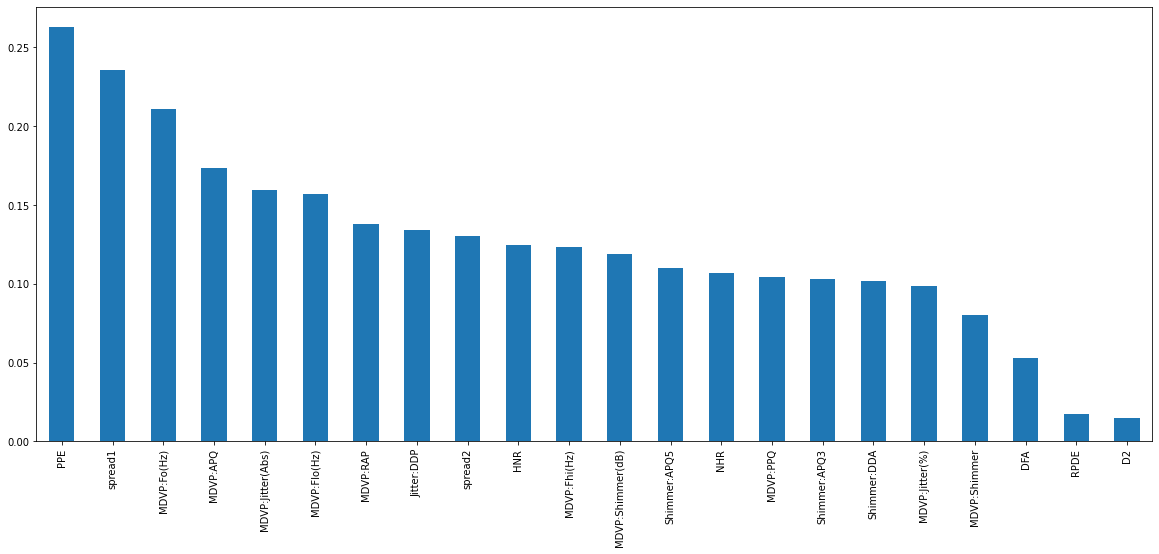

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
#Now we Will select the  top 10 important features
sel_ten_cols = SelectKBest(mutual_info_classif, k=10)
sel_ten_cols.fit_transform(X_train, y_train)
cols = X_train.columns[sel_ten_cols.get_support()]
cols

Index(['MDVP:Fo(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(Abs)', 'MDVP:RAP',
       'Jitter:DDP', 'MDVP:APQ', 'HNR', 'spread1', 'spread2', 'PPE'],
      dtype='object')

In [ ]:
X_train_fs = pd.DataFrame(sel_ten_cols.fit_transform(X_train, y_train), columns = cols)
X_test_fs = pd.DataFrame(sel_ten_cols.transform(X_test), columns = cols)

In [ ]:
X_train_fs.head()

,MDVP:Fo(Hz),MDVP:Flo(Hz),MDVP:Jitter(Abs),MDVP:RAP,Jitter:DDP,MDVP:APQ,HNR,spread1,spread2,PPE
0,128.940,88.251,0.00005,0.00241,0.00723,0.01734,24.743,-6.186128,0.279933,0.152428
1,125.791,96.206,0.00011,0.00826,0.02478,0.03908,15.433,-5.159169,0.202146,0.260375
2,116.879,108.153,0.00007,0.00334,0.01003,0.02137,22.603,-4.476755,0.262633,0.326197
3,96.106,84.510,0.00007,0.00389,0.01168,0.02876,19.055,-4.441519,0.155097,0.327978
4,178.285,82.063,0.00003,0.00157,0.00472,0.01151,25.020,-4.913137,0.393056,0.251972


**Handling Imbalanced Dataset**

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
sm=SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train_fs, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))

The number of classes before fit Counter({1: 118, 0: 38})
The number of classes after fit Counter({1: 118, 0: 118})


**Model Building**

XG boost

In [ ]:
import xgboost
from sklearn.model_selection import GridSearchCV

In [ ]:
#List Hyperparameters to tune

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ]
}

In [ ]:
xgb = xgboost.XGBClassifier()
xgb_cv = GridSearchCV(xgb, params, cv = 10, n_jobs = -1)

In [ ]:
xgb_cv.fit(X_train_res,y_train_res)

GridSearchCV(cv=10, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                         'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'min_child_weight': [1, 3, 5, 7]})

In [ ]:
xgb_cv.best_estimator_

XGBClassifier(gamma=0.0, learning_rate=0.3, max_depth=6)

In [ ]:
xgb_model = xgboost.XGBClassifier(gamma=0.0, learning_rate=0.3, max_depth=6)
xgb_model.fit(X_train_res, y_train_res)

XGBClassifier(gamma=0.0, learning_rate=0.3, max_depth=6)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
y_pred1 = xgb_model.predict(X_test_fs)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[ 8  2]
 [ 3 26]]
0.8717948717948718
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.93      0.90      0.91        29

    accuracy                           0.87        39
   macro avg       0.83      0.85      0.84        39
weighted avg       0.88      0.87      0.87        39



0.8482758620689657

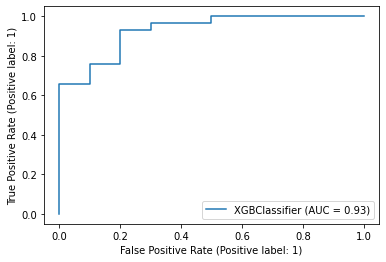

In [ ]:
metrics.plot_roc_curve(xgb_model, X_test_fs, y_test)
metrics.roc_auc_score(y_test, y_pred1, average=None)

Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
#List Hyperparameters to tune

params = {
    'var_smoothing': np.logspace(-11,-5, num=100)
}

In [ ]:
gnb = GaussianNB()
gnb_cv = GridSearchCV(gnb, params, cv = 10, n_jobs = -1)

In [ ]:
gnb_cv.fit(X_train_res,y_train_res)

GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e-11, 1.14975700e-11, 1.32194115e-11, 1.51991108e-11,
       1.74752840e-11, 2.00923300e-11, 2.31012970e-11, 2.65608778e-11,
       3.05385551e-11, 3.51119173e-11, 4.03701726e-11, 4.64158883e-11,
       5.33669923e-11, 6.13590727e-11, 7.05480231e-11, 8.11130831e-11,
       9.32603347e-11, 1.072267...
       4.03701726e-07, 4.64158883e-07, 5.33669923e-07, 6.13590727e-07,
       7.05480231e-07, 8.11130831e-07, 9.32603347e-07, 1.07226722e-06,
       1.23284674e-06, 1.41747416e-06, 1.62975083e-06, 1.87381742e-06,
       2.15443469e-06, 2.47707636e-06, 2.84803587e-06, 3.27454916e-06,
       3.76493581e-06, 4.32876128e-06, 4.97702356e-06, 5.72236766e-06,
       6.57933225e-06, 7.56463328e-06, 8.69749003e-06, 1.00000000e-05])})

In [ ]:
gnb_cv.best_estimator_

GaussianNB(var_smoothing=3.274549162877732e-08)

In [ ]:
gnb_model = GaussianNB(var_smoothing=1e-11)
gnb_model.fit(X_train_res, y_train_res)

GaussianNB(var_smoothing=1e-11)

In [ ]:
y_pred2 = gnb_model.predict(X_test_fs)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[ 8  2]
 [12 17]]
0.6410256410256411
              precision    recall  f1-score   support

           0       0.40      0.80      0.53        10
           1       0.89      0.59      0.71        29

    accuracy                           0.64        39
   macro avg       0.65      0.69      0.62        39
weighted avg       0.77      0.64      0.66        39



0.6931034482758621

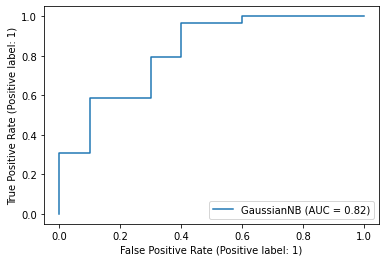

In [ ]:
metrics.plot_roc_curve(gnb_model, X_test_fs, y_test)
metrics.roc_auc_score(y_test, y_pred2, average=None)

Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
adaboost =  AdaBoostClassifier()

params = {
    "n_estimators":[5,10,50,100,200],
    "learning_rate":[0.0001,0.001,0.01,0.1,0.2,0.3,0.7]
}

In [ ]:
adaboost_cv = GridSearchCV(adaboost, params, cv = 10, n_jobs = -1)

In [ ]:
adaboost_cv.fit(X_train_res,y_train_res)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,
                                           0.7],
                         'n_estimators': [5, 10, 50, 100, 200]})

In [ ]:
adaboost_cv.best_estimator_

AdaBoostClassifier(learning_rate=0.7, n_estimators=100)

In [ ]:
adaboost_model = AdaBoostClassifier(learning_rate=0.3, n_estimators=100)
adaboost_model.fit(X_train_res, y_train_res)

AdaBoostClassifier(learning_rate=0.3, n_estimators=100)

In [ ]:
y_pred3 = adaboost_model.predict(X_test_fs)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[ 9  1]
 [ 2 27]]
0.9230769230769231
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.96      0.93      0.95        29

    accuracy                           0.92        39
   macro avg       0.89      0.92      0.90        39
weighted avg       0.93      0.92      0.92        39



0.9155172413793103

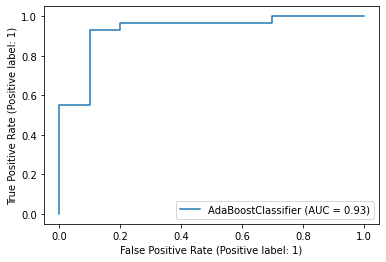

In [ ]:
metrics.plot_roc_curve(adaboost_model, X_test_fs, y_test)
metrics.roc_auc_score(y_test, y_pred3, average=None)

Model Pickling

In [ ]:
import pickle
# open a file, where you want to store the data
file = open('parkinson_prediction.pkl', 'wb')

# dump information to that file
pickle.dump(adaboost_model, file)

**Predictions**

In [ ]:
def predict_disease(Fo,Flo,Jitter,RAP,DDP,APQ,HNR,Spread1,Spread2,PPE):
    fo = float(Fo)
    flo = float(Flo)
    jitter = float(Jitter)
    rap = float(RAP)
    ddp = float(DDP)
    apq = float(APQ)
    hnr = float(HNR)
    spread1 = float(Spread1)
    spread2 = float(Spread2)
    ppe = float(PPE)

    x = [[fo, flo, jitter, rap, ddp, apq, hnr, spread1, spread2, ppe]]
    
    return adaboost_model.predict(x)

In [ ]:
predict_disease(119.92, 74.97, 0.00007, 0.0037, 0.011, 0.005, 21.03, -4.81, 0.266, 0.284)

array([1])

In [ ]:
# Prediction 1
# Input sequence: Fo,Flo,Jitter,RAP,DDP,APQ,HNR,Spread1,Spread2,PPE
prediction = predict_disease(119.92, 74.97, 0.00007, 0.0037, 0.011, 0.017, 21.03, -4.81, 0.266, 0.284)[0]
if prediction == 1:
  print("The person has Parkinson disease.")
else:
  print("The person does not have Parkinson disease.")

The person has Parkinson disease.


In [ ]:
# Prediction 2
# Input sequence: Fo,Flo,Jitter,RAP,DDP,APQ,HNR,Spread1,Spread2,PPE
prediction = predict_disease(174.188, 94.261, 0.00003, 0.00263, 0.0079, 0.017, 19.517, -6.538586, 0.121, 0.133)[0]
if prediction == 1:
  print("The person has Parkinson disease.")
else:
  print("The person does not have Parkinson disease.")

The person does not have Parkinson disease.
